#### <i>Obs: Nota-se a simplicidade desse notebook, pois é meu primeiro estudo em machine learning com o pactore Scikit-Learn</i>
Estudo realizado junto ao curso <i>Python Fundamentos Para Análise de Dados 3.0</i> da <a href="https://www.datascienceacademy.com.br/">DSA</a>.
### Prevendo o Preço da Pizza
Suponha que você queira prever o preço da pizza. Para isso, vamos criar um modelo de regressão linear para prever o preço da pizza, baseado em um atributo da pizza que podemos observar. Vamos modelar a relação entre o tamanho (diâmetro) de uma pizza e seu preço. Escreveremos então um programa com sckit-learn, que prevê o preço da pizza dado seu tamanho. 
<br><br>
O conjunto de técnicas de regressão é muito provavelmente um dos mais simples modelos utilizadoa em análises de dados que procuram entender a relação entre o comportamento de determinado fenômeno e o comportamento de uma ou mais variáveis potencialmente preditoras, sem que haja, entretanto uma obrigatória relação de causa e efeito.
<br><br>
É de fundamental importância que o pesquisador seja bastante cuidadoso e criterioso ao interpretar os resultados de uma modelagem de regressão. A existência de um modelo de regressão não significa que ocorra, obrigatoriamente, relação de causa e efeito entre as variáveis consideradas

In [235]:
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import stats

%matplotlib inline

### Dados - diâmetros e preços das pizzas

<table class="ArticleTableNoBorder">
	<tbody>
		<tr>
			<td><strong>Instância</strong></td>
			<td><strong>Diâmetro(cm)</strong></td>
            <td><strong>Preço(R$)</strong></td>
		</tr>
		<tr>
			<td><code>1</code></td>
			<td>7</td>
            <td>8</td>
		</tr>
		<tr>
			<td><code>2</code></td>
			<td>10</td>
            <td>11</td>
		</tr>
		<tr>
			<td><code>3</code></td>
			<td>15</td>
            <td>16</td>
		</tr>
		<tr>
			<td><code>4</code></td>
			<td>30</td>
            <td>38.5</td>
		</tr>
		<tr>
			<td><code>5</code></td>
			<td>45</td>
            <td>52</td>
		</tr>
	</tbody>
</table>

In [236]:
diametro = [[7], [10], [15], [30], [45]]
preco = [[8], [11], [16], [38.5], [52]]

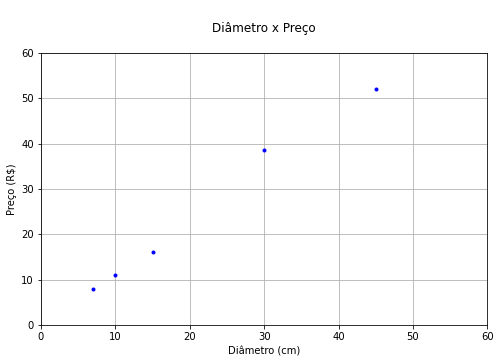

In [237]:
# explorando os dados
plt.figure(figsize=(8, 5))
plt.plot(diametro, preco, '.b')
plt.title('\nDiâmetro x Preço\n')
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Preço (R$)')
plt.axis([0, 60, 0, 60])
plt.grid(True)
plt.show()

Aqui existe uma relação positiva. Conforme o tamanho do diâmetro aumenta, o preço também aumenta, porém, não prova causa e efeito.

In [238]:
# X = diametro
X = [[7], [10], [15], [30], [45]]
# Y = preco
Y = [[8], [11], [16], [38.5], [52]]

modelo = LinearRegression()
type(modelo)

sklearn.linear_model._base.LinearRegression

In [240]:
# treinando o modelo
modelo.fit(X, Y)
# previsao
print('\nPrevisão de preço para uma pizza de 20 cm: R$ %.2f'%modelo.predict([[20]]))
print('\nPrevisão de preço para uma pizza de 18 cm: R$ %.2f'%modelo.predict([[18]]))
print('\nPrevisão de preço para uma pizza de 35 cm: R$ %.2f'%modelo.predict([[35]]))


Previsão de preço para uma pizza de 20 cm: R$ 23.41

Previsão de preço para uma pizza de 18 cm: R$ 21.01

Previsão de preço para uma pizza de 35 cm: R$ 41.48


O modelo aprendeu a relação matemática entre <i>diâmetro e preço</i>. Sempre que um novo diâmentro for apresentado, ele será capaz de prever o preço.

**Fórmula da regressão:**
<img src="regressao_code.gif"/>
<br><br>
**Y** - é o valor previsto da variável dependente (preço da Pizza)<br>
**X** - é a variável explanatória (diâmetro da Pizza)<br>
**Alfa** - é o termo de intercepção ou coeficiente linear<br>
**Beta** - é o coeficiente de cada variável ou coeficiente angular
<br><br>
Alfa e Beta são parâmetros do modelo que são aprendidos pelo algorítmo de aprendizagem.

In [211]:
print('\nCoeficiente: %.2f'%modelo.coef_[0][0])

# mean square error - erro calculado de comparação da previsão com os dados históricos
print('MSE: %.2f'%np.mean(modelo.predict(X) - Y)**2)

# quanto mais próximo de um, melhor a previsão
print('Score de variação: %.2f'%modelo.score(X, Y))


Coeficiente: 1.20
MSE: 0.00
Score de variação: 0.99


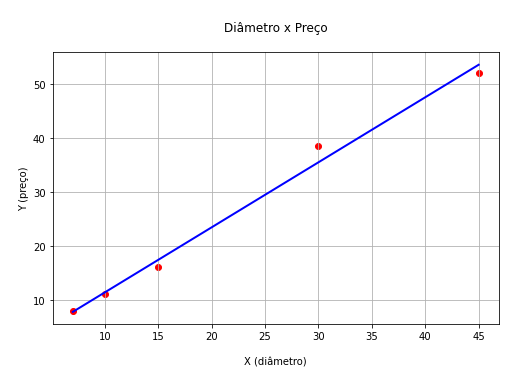

In [212]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='r')
plt.plot(X, modelo.predict(X), color='b', lw=2)
plt.title('\nDiâmetro x Preço\n')
plt.xlabel('\nX (diâmetro)')
plt.ylabel('\nY (preço)')
plt.grid(True)
plt.show()

A linha azul é a linha de regressão. Nela estão todos os valores que o modelo pode prever. É possível ligar qualquer valor do eixo <b>X (diâmetro)</b> a linha azul que será possível encontrar o preço da pizza, pois o modelo já sabe qual é a relação entre <i>preço</i> e <i>diâmetro</i>.

## Boston Housing

Dataset: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

### Exploração e tratamento dos dados

In [241]:
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [242]:
print('Total de linhas: {}\nTotal de colunas: {}'
      .format(boston.data.shape[0], boston.data.shape[1]))

Total de linhas: 506
Total de colunas: 13


In [243]:
# descricao do dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [244]:
# atributos - menos MEDV que é o preço da casa (target)
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [245]:
# converter para dataframe - variáveis preditoras
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [246]:
# alterando o nome das colunas - variáveis preditoras
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [247]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [248]:
# criando uma coluna PRICE no df e atribuindo a variável target
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Previsão dos preços das casas
**X** - variáveis independentes (todas as características das casas)<br>
**Y** - variável dependente (preço)

In [249]:
# retirando o PRICE do df
X = df.drop('PRICE', axis=1)
Y = df.PRICE

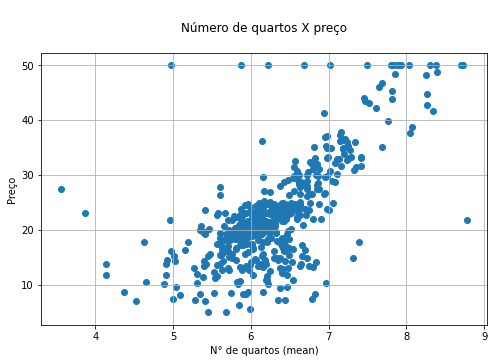

In [250]:
plt.figure(figsize=(8, 5))
plt.scatter(df.RM, Y)
plt.xlabel('N° de quartos (mean)')
plt.ylabel('Preço')
plt.title('\nNúmero de quartos X preço\n')
plt.grid(True)
plt.show()

Há uma relação positiva. A medida que o número de quartos aumenta, o preço também aumenta.

In [251]:
regressao = LinearRegression()
type(regressao)

sklearn.linear_model._base.LinearRegression

In [252]:
regressao.fit(X, Y)
print('\nCoeficiente: ', regressao.intercept_)
print('Número de coeficientes: ', len(regressao.coef_))


Coeficiente:  36.45948838509009
Número de coeficientes:  13


In [253]:
# erro -> foi mostrado ao modelo dados que ele já conhece
regressao.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

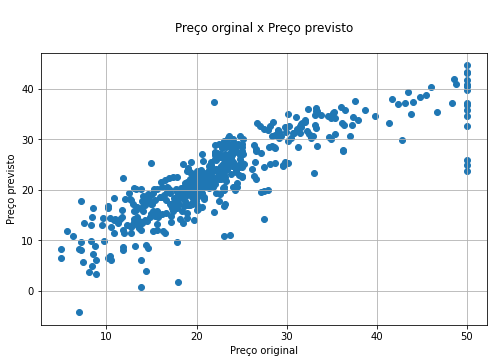

In [254]:
plt.figure(figsize=(8, 5))
plt.scatter(df.PRICE, regressao.predict(X))
plt.xlabel('Preço original')
plt.ylabel('Preço previsto')
plt.title('\nPreço orginal x Preço previsto\n')
plt.grid(True)
plt.show()

Existe uma relação mas com erros. O modelo previu com dados que já conhece.

In [255]:
mse_boston = np.mean((df.PRICE - regressao.predict(X))**2)
print('\nMean Square Error: {:.2f}'.format(mse_boston))


Mean Square Error: 21.89


In [256]:
# usando apenas uma variável preditora
regressao = LinearRegression()
regressao.fit(X[['PTRATIO']], df.PRICE)
mse_boston_2 = np.mean((df.PRICE - regressao.predict(X[['PTRATIO']]))**2)
print('\nMean Square Error: {:.2f}'.format(mse_boston_2))


Mean Square Error: 62.65


Usando apenas uma variável independente, o MSE aumentou, o que indica que apenas uma característica não é um bom preditor prara o preço.

### Dividindo os dados em treino e teste

In [257]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=5)
print('\nX_treino {} e X_teste {}'.format(X_treino.shape, X_teste.shape))
print('Y_treino {} e Y_teste {}'.format(Y_treino.shape, Y_teste.shape))


X_treino (354, 13) e X_teste (152, 13)
Y_treino (354,) e Y_teste (152,)


In [258]:
modelo_2 = LinearRegression()
modelo_2.fit(X_treino, Y_treino)
treino = modelo_2.predict(X_treino) # apenas para averiguar o procedimento
teste = modelo_2.predict(X_teste)

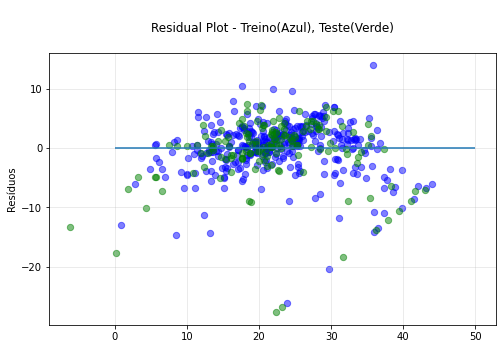

In [272]:
# resíduos nas previsões de treino e teste
plt.figure(figsize=(8, 5))
plt.scatter(treino, treino - Y_treino, c='b', s=40, alpha=0.5)
plt.scatter(teste, teste - Y_teste, c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel('Resíduos')
plt.title('\nResidual Plot - Treino(Azul), Teste(Verde)\n')
plt.grid(True, alpha=0.3)
plt.show()

Diferenças nas previsões de treino e teste possibilita verificar se o modelo sofre overfitting ou underfitting.